# Social Financial Lending: Data Preprocessing and Model Training

In [1]:
import pandas as pd 
import numpy as np

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the data 
df_train = pd.read_csv("application_train.csv")
df_test = pd.read_csv("application_test.csv")

print('Training data shape: ', df_train.shape)
df_train.head()
print('Testing data shape: ', df_test.shape)
df_test.head()

Training data shape:  (257512, 122)
Testing data shape:  (49999, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


0    236713
1     20799
Name: TARGET, dtype: int64


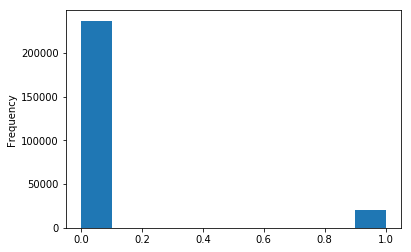

In [3]:
print(df_train['TARGET'].value_counts())
df_train['TARGET'].astype(int).plot.hist()

In [4]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(df_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 66 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,179905,69.9
COMMONAREA_AVG,179905,69.9
COMMONAREA_MODE,179905,69.9
NONLIVINGAPARTMENTS_MEDI,178800,69.4
NONLIVINGAPARTMENTS_MODE,178800,69.4
NONLIVINGAPARTMENTS_AVG,178800,69.4
FONDKAPREMONT_MODE,176104,68.4
LIVINGAPARTMENTS_MODE,175973,68.3
LIVINGAPARTMENTS_MEDI,175973,68.3
LIVINGAPARTMENTS_AVG,175973,68.3


#### Checking the number of different categories in each Categorical column 

In [5]:
# Number of each type of column
df_train.dtypes.value_counts()
# Number of unique classes in each object column
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

#### Label Encoding columns which have 2 categories in it

In [6]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df_train:
    if df_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_train[col])
            # Transform both training and testing data
            df_train[col] = le.transform(df_train[col])
            df_test[col] = le.transform(df_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


#### One hot encoding of remaining categorical variables using get dummies and dropping first

In [7]:
app_train = df_train.copy()
app_test = df_test.copy()
df_train = pd.get_dummies(df_train, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

# shape of training and testing after one hot encoding
print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (257512, 230)
Testing Features shape:  (49999, 229)


In [8]:
# checking if any duplicate entries for a particular SK_ID_CURR ID
print(len(df_train.SK_ID_CURR.unique()))
print(len(df_test.SK_ID_CURR.unique()))

257512
49999


#### Checking for any anomalies in the dataset 

In [10]:
#Anomalies in numerical data 
print((df_train['DAYS_BIRTH'] / -365).describe())
print(df_train['DAYS_EMPLOYED'].describe())
print(df_train['DAYS_REGISTRATION'].describe())
print(df_train['DAYS_ID_PUBLISH'].describe())

count    257512.000000
mean         43.944927
std          11.957517
min          20.517808
25%          34.027397
50%          43.158904
75%          53.942466
max          69.120548
Name: DAYS_BIRTH, dtype: float64
count    257512.000000
mean      63930.692845
std      141368.981432
min      -17912.000000
25%       -2756.000000
50%       -1212.000000
75%        -288.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
count    257512.000000
mean      -4987.836264
std        3522.373511
min      -24672.000000
25%       -7483.000000
50%       -4506.000000
75%       -2012.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64
count    257512.000000
mean      -2993.698562
std        1509.494575
min       -7197.000000
25%       -4299.000000
50%       -3253.000000
75%       -1719.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64


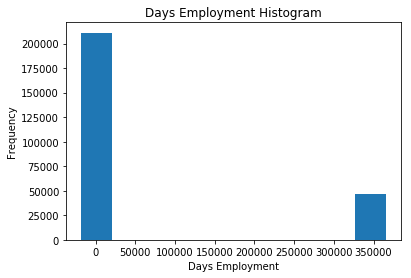

In [11]:
# DAYS_EMPLOYED does seems have anomalies the distribution doesnt seem right
df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

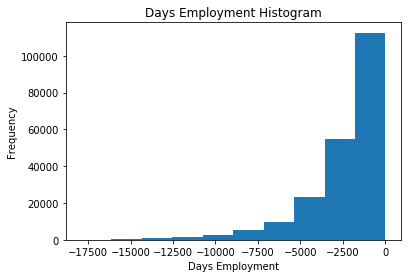

In [12]:
# replacing the outlier value with NaN 
# Create an anomalous flag column
df_train['DAYS_EMPLOYED_ANOM'] = df_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [13]:
# doing the same for the test set
df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243
df_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (df_test["DAYS_EMPLOYED_ANOM"].sum(), len(df_test)))

There are 8924 anomalies in the test data out of 49999 entries


#### Feature Engineering
we can make a couple features that attempt to capture what we think may be important for telling whether a client will default on a loan. Here I'm going to use five features that were inspired by the script by Aguiar on kaggle 

    CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
    ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
    CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
    DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [14]:
df_train_exf = df_train.copy()
df_test_exf = df_test.copy()

df_train_exf['CREDIT_INCOME_PERCENT'] = df_train_exf['AMT_CREDIT'] / df_train_exf['AMT_INCOME_TOTAL']
df_train_exf['ANNUITY_INCOME_PERCENT'] = df_train_exf['AMT_ANNUITY'] / df_train_exf['AMT_INCOME_TOTAL']
df_train_exf['CREDIT_TERM'] = df_train_exf['AMT_ANNUITY'] / df_train_exf['AMT_CREDIT']
df_train_exf['DAYS_EMPLOYED_PERCENT'] = df_train_exf['DAYS_EMPLOYED'] / df_train_exf['DAYS_BIRTH']


df_test_exf['CREDIT_INCOME_PERCENT'] = df_test_exf['AMT_CREDIT'] / df_test_exf['AMT_INCOME_TOTAL']
df_test_exf['ANNUITY_INCOME_PERCENT'] = df_test_exf['AMT_ANNUITY'] / df_test_exf['AMT_INCOME_TOTAL']
df_test_exf['CREDIT_TERM'] = df_test_exf['AMT_ANNUITY'] / df_test_exf['AMT_CREDIT']
df_test_exf['DAYS_EMPLOYED_PERCENT'] = df_test_exf['DAYS_EMPLOYED'] / df_test_exf['DAYS_BIRTH']


In [15]:
X = df_train_exf.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = df_train_exf.TARGET
feature_name = X.columns.tolist()

X_test = df_test_exf.drop(['SK_ID_CURR'], axis=1)
X_test_ids = df_test_exf['SK_ID_CURR']

#### Data Preprocessing

In [22]:
from sklearn.preprocessing import MinMaxScaler, Imputer
# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(X)

# Transform both training and testing data
X = imputer.transform(X)
X_test = imputer.transform(X_test)

# Repeat with the scaler
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

print('Training data shape: ', X.shape)
print('Testing data shape: ', X_test.shape)

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Training data shape:  (257512, 233)
Testing data shape:  (49999, 233)


#### Classification and ROC analysis

In [17]:
import numpy as np
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [23]:
def run_classifier_plot_roc(classifier, X, y):
    cv = StratifiedKFold(n_splits=5)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return classifier


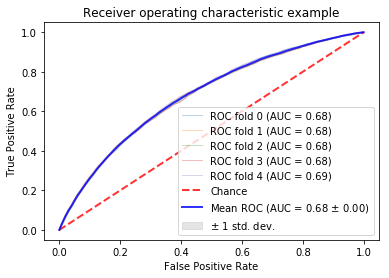

In [24]:
# Base model using Logistic Regression to compare the accuracy
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(C = 0.0001)
lr_out_clf = run_classifier_plot_roc(lr_clf, X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.6s
[Parall

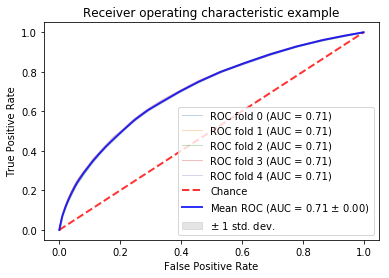

In [25]:
# Random forest classifer check auc_roc_score and feature importance
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
rf_out_clf = run_classifier_plot_roc(rf_clf, X, y)

In [26]:
# get important features from random forest classifier
feature_importance_values = rf_out_clf.feature_importances_
feature_importances = pd.DataFrame({'feature': feature_name, 'importance': feature_importance_values})
feature_importances

,feature,importance
0,NAME_CONTRACT_TYPE,0.001537
1,FLAG_OWN_CAR,0.003969
2,FLAG_OWN_REALTY,0.004537
3,CNT_CHILDREN,0.006488
4,AMT_INCOME_TOTAL,0.021357
5,AMT_CREDIT,0.023886
6,AMT_ANNUITY,0.025882
7,AMT_GOODS_PRICE,0.021106
8,REGION_POPULATION_RELATIVE,0.021685
9,DAYS_BIRTH,0.029571


#### Getting 95% of important features from feature importance of random forest

In [27]:
def main_features(data):
    cumsum = data.sort_values('importance', ascending=False)
    cumsum = cumsum.set_index('feature')
    total=0
    j = 0
    values = []
    for i in cumsum.iloc[:,0]:
        total += i    
        if total <=0.95:
            values.append(cumsum.index[j])
            j += 1       
    return values
            
main_feature_imp_list = main_features(feature_importances)
len(main_feature_imp_list)

127

Number of features have reduced from 233 to 127 now, lets use these features and re run our random forest model to check how it affects the accuracy

In [28]:
# using subset of the features extracted from the important features
X_sub_main = df_train_exf[main_feature_imp_list]
test_sub_main = df_test_exf[main_feature_imp_list]

In [30]:
# Median imputation of missing values
imputer1 = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler1 = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer1.fit(X_sub_main)

# Transform both training and testing data
X_sub = imputer1.transform(X_sub_main)
X_test_sub = imputer1.transform(test_sub_main)

# Repeat with the scaler
scaler.fit(X_sub)
X_sub = scaler.transform(X_sub)
X_test_sub = scaler.transform(X_test_sub)

print('Training data shape: ', X_sub.shape)
print('Testing data shape: ', X_test_sub.shape)

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Training data shape:  (257512, 127)
Testing data shape:  (49999, 127)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.4s
[Parall

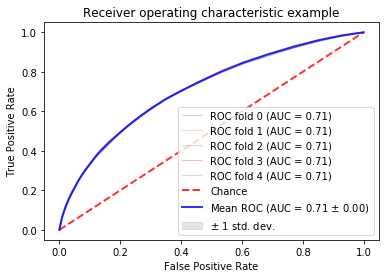

In [32]:
rf_clf_1 = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
rf_out_clf_1 = run_classifier_plot_roc(rf_clf_1, X_sub, y)

#### We get same results using only 127 features from 233. Lets use these features and train Gradient boosting classsifier to check the results

      Iter       Train Loss   Remaining Time 
         1           0.5529            5.17m
         2           0.5466            7.22m
         3           0.5417            7.79m
         4           0.5378            6.86m
         5           0.5345            6.32m
         6           0.5317            5.90m
         7           0.5294            5.59m
         8           0.5270            5.47m
         9           0.5252            5.54m
        10           0.5234            5.58m
        20           0.5122            4.34m
        30           0.5052            3.78m
        40           0.5009            3.22m
        50           0.4977            2.61m
        60           0.4954            2.05m
        70           0.4935            1.54m
        80           0.4917            1.03m
        90           0.4903           30.46s
       100           0.4891            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.5529            4.54m
        

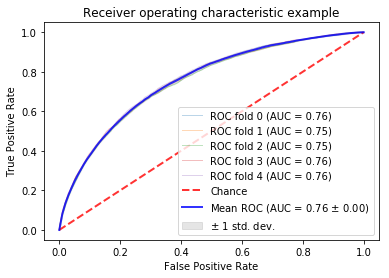

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_clf = GradientBoostingClassifier(n_estimators = 100, random_state = 50, verbose = 1)
gbm_out_clf = run_classifier_plot_roc(gbm_clf, X_sub, y)

In [34]:
df_train_exf.to_csv("app_train_ex_features.csv", index=False)

#### Lets use the gbm model which has given us the highest auc_roc_score to predict on the testing set

In [35]:
preds = gbm_out_clf.predict(X_test_sub)

In [36]:
preds.shape

(49999,)

In [37]:
df_sub = pd.DataFrame()
df_sub['SK_ID_CURR'] = X_test_ids
df_sub['TARGET'] = preds
df_sub.head(5)

,SK_ID_CURR,TARGET
0,100002,0
1,100003,0
2,100004,0
3,100006,0
4,100007,0


In [38]:
df_sub.to_csv("submission_4.csv", index=False)

In [39]:
preds_prob = gbm_out_clf.predict_proba(X_test_sub)
preds_prob.shape

(49999, 2)

In [44]:
probs=[]
for p in preds_prob:
    probs.append(p[0])

probs

[0.5740864517216684,
 0.9496864908267536,
 0.9534081924700709,
 0.9491771182800759,
 0.8902184826349615,
 0.9034331153408746,
 0.9830781121356947,
 0.9642144753522309,
 0.9527025734049205,
 0.9472352197093025,
 0.9473883518415681,
 0.9757364540372453,
 0.9103130690667082,
 0.9632519571049828,
 0.9645210919628078,
 0.9023550802822204,
 0.47227972810229735,
 0.9431058059851758,
 0.9685683022578102,
 0.9536268542607269,
 0.8979163992528956,
 0.9136526949192012,
 0.8962970465032702,
 0.9780153905972658,
 0.9548135563643299,
 0.9582329303220483,
 0.857051152961577,
 0.9030157883286419,
 0.9717276841194694,
 0.9415015848548721,
 0.922965255644078,
 0.8891686101404677,
 0.9806027448179049,
 0.9041070879856462,
 0.9147952372324951,
 0.9729370943996094,
 0.9775674437931215,
 0.9745174081440839,
 0.9740563799948031,
 0.9787052408189699,
 0.8309037700870395,
 0.7039850222766372,
 0.9455327491058212,
 0.9781307966107003,
 0.8974628893574186,
 0.9055455123019517,
 0.8888529838532395,
 0.96248879534

In [46]:
df_sub_2 = pd.DataFrame()
df_sub_2['SK_ID_CURR'] = X_test_ids
df_sub_2['TARGET'] = probs
df_sub_2.head(5)

,SK_ID_CURR,TARGET
0,100002,0.574086
1,100003,0.949686
2,100004,0.953408
3,100006,0.949177
4,100007,0.890218


In [47]:
df_sub_2.to_csv("submission_2.csv", index=False)

In [51]:
feature_importances.sort_values("importance", ascending=False)

,feature,importance
31,EXT_SOURCE_2,4.794686e-02
32,EXT_SOURCE_3,4.389440e-02
12,DAYS_ID_PUBLISH,2.981548e-02
9,DAYS_BIRTH,2.957080e-02
11,DAYS_REGISTRATION,2.873036e-02
231,CREDIT_TERM,2.767069e-02
230,ANNUITY_INCOME_PERCENT,2.720301e-02
229,CREDIT_INCOME_PERCENT,2.632103e-02
6,AMT_ANNUITY,2.588166e-02
10,DAYS_EMPLOYED,2.574942e-02


#### Due to resource and time contraints could not complete Grid Search on the model 